<header>
    <p style="text-align:center; font-size: 30px; color: green"><b>Exploratoratory Data Analysis</b></p>
</header>

<div style="border: 2px solid  gray;">
    The objective of this notebook is to propose an analytical view of Brazillian e-commerce relationship datasets. For this we will first go trough an exploratory data analysis using graphical tools to create self explanatory plots for better understanding what is behind braziian online purchasing. Finally we will look at customers reviews and implement.
    
We will go trough a extensive journey for understanding the data and plotting some useful charts to clarify the concepts and get insights from data and, at the end, we will go trough a step-by-step code on text preparating and sentiment classification using the reviews left from customer on online platforms. I hope you enjoy this notebook!
Before getting to work, I want to thanks [Raeshid David](https://www.kaggle.com/raenish) for sharing his content and inspiring the style and organization of this notebook.
</div>

  <a id="top"></a>
    <div class="list-group" id="list-tab" role="tablist">
    <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Content</h3>
        
* [1. Libraries](#1)
* [2. Datasets](#2)

 <a id="1"></a>
<font color="lightblue" size=+2.5><b>1. Libraries</b></font>

In [2]:
#data cleaning
import numpy as np
import pandas as pd
import datetime
import math

#data visualization
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import plotly as py
import plotly.graph_objs as go
%matplotlib inline

#palette
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

#datapreprocessing + clustering
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from scipy.stats import skew, norm, probplot, boxcox

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

 <a id="2"></a>
<font color="lightblue" size=+2.5><b>2. Datasets</b></font>

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

In [3]:
#import data
customer_df = pd.read_csv('../Data/OriginalDatasets/olist_customers_dataset.csv')
geolocation_df = pd.read_csv('../Data/OriginalDatasets/olist_geolocation_dataset.csv')
orders_df = pd.read_csv('../Data/OriginalDatasets/olist_orders_dataset.csv')
items_df = pd.read_csv('../Data/OriginalDatasets/olist_order_items_dataset.csv')
payments_df = pd.read_csv('../Data/OriginalDatasets/olist_order_payments_dataset.csv')
reviews_df = pd.read_csv('../Data/OriginalDatasets/olist_order_reviews_dataset.csv')
products_df = pd.read_csv('../Data/OriginalDatasets/olist_products_dataset.csv')
sellers_df = pd.read_csv('../Data/OriginalDatasets/olist_sellers_dataset.csv')

# Collections for each dataset
datasets = [customer_df, geolocation_df, orders_df, items_df, payments_df,
            reviews_df, products_df, sellers_df]
names = ['customer_df', 'geolocation_df', 'orders_df', 'items_df', 'payments_df',
         'reviews_df', 'products_df', 'sellers_df']

<font color="darkgrey" size=+2.5><b>Data Overview</b></font>

In [4]:
#constructing info table for datasets
info_tab = pd.DataFrame({})

info_tab['Dataset'] = names
info_tab['Shape'] = [df.shape for df in datasets]
info_tab['null-amount'] = [df.isnull().sum().sum() for df in datasets]
info_tab['num_of_null_col'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
info_tab['null_col'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

info_tab

,Dataset,Shape,null-amount,num_of_null_col,null_col
0,customer_df,"(99441, 5)",0,0,
1,geolocation_df,"(1000163, 5)",0,0,
2,orders_df,"(99441, 8)",4908,3,"order_approved_at, order_delivered_carrier_dat..."
3,items_df,"(112650, 7)",0,0,
4,payments_df,"(103886, 5)",0,0,
5,reviews_df,"(99224, 7)",145903,2,"review_comment_title, review_comment_message"
6,products_df,"(32951, 9)",2448,8,"product_category_name, product_name_lenght, pr..."
7,sellers_df,"(3095, 4)",0,0,


In [5]:
#constructing describe table for datasets
des_tab = pd.DataFrame()
type_list = []

for df in datasets:
    des_tab = pd.concat([des_tab,df.describe().transpose()], axis=0)
    
#object type
obj_df = pd.DataFrame({})

for df in datasets:
    for col in df:
        obj_df = pd.concat([obj_df, pd.DataFrame({'col':col, 'type':df[col].dtypes}, index=[0])],axis=0)

#merge back to des_tab
des_tab = des_tab.merge(obj_df, left_on=des_tab.index, right_on='col')

#drop unecessary columns
des_tab.drop(['25%','75%','top','freq'],axis=1,inplace=True)
des_tab.set_index('col', inplace=True)

#display
des_tab

,count,mean,std,min,50%,max,unique,type
col,,,,,,,,
customer_zip_code_prefix,99441.0,35137.474583,29797.938996,1003.000000,24416.000000,99990.000000,NaN,int64
geolocation_zip_code_prefix,1000163.0,36574.166466,30549.335710,1001.000000,26530.000000,99990.000000,NaN,int64
geolocation_lat,1000163.0,-21.176153,5.715866,-36.605374,-22.919377,45.065933,NaN,float64
geolocation_lng,1000163.0,-46.390541,4.269748,-101.466766,-46.637879,121.105394,NaN,float64
order_id,99441,NaN,NaN,NaN,NaN,NaN,99441,object
order_id,99441,NaN,NaN,NaN,NaN,NaN,99441,object
order_id,99441,NaN,NaN,NaN,NaN,NaN,99441,object
order_id,99441,NaN,NaN,NaN,NaN,NaN,99441,object
customer_id,99441,NaN,NaN,NaN,NaN,NaN,99441,object


### 3) Statistical Analysis

### a) Customer analysis

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


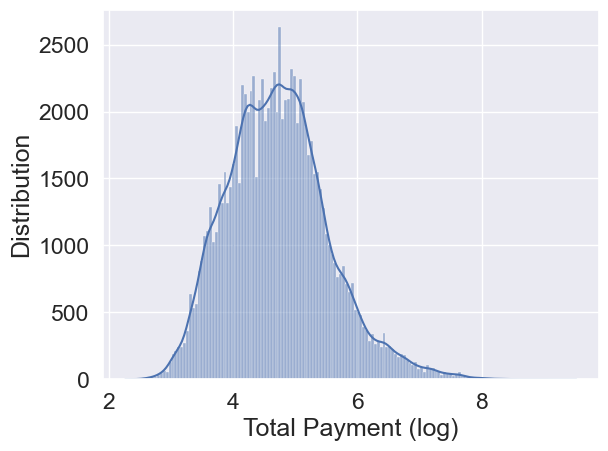

In [6]:
#extract info of total payment per unique customer
customer_order = customer_df.merge(orders_df, on='customer_id', how='left')
customer_payment = customer_order.merge(payments_df, on='order_id', how='left')
customer_payment = customer_payment.groupby('customer_unique_id').agg({'payment_value':'sum'})

#plotting histogram
sns.histplot(np.log(customer_payment['payment_value']), kde=True)

#annotate
plt.xlabel('Total Payment (log)')
plt.ylabel('Distribution')

#diplay
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='review_score'>

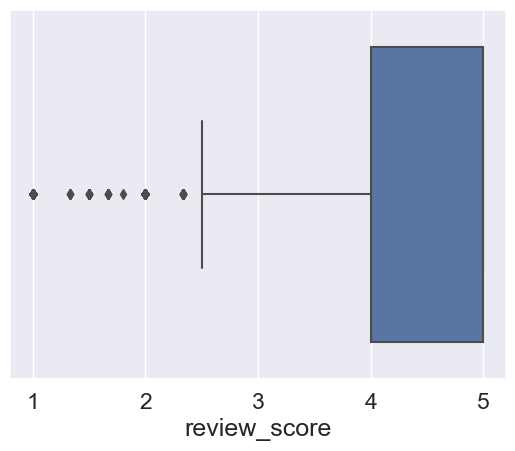

In [7]:
customers_reviews = customer_order.merge(reviews_df, on='order_id', how='left')
customers_reviews = customers_reviews.groupby('customer_unique_id').mean('review_score')
customers_reviews.drop('customer_zip_code_prefix', axis=1, inplace=True)

sns.boxplot(customers_reviews['review_score'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='review_score', ylabel='count'>

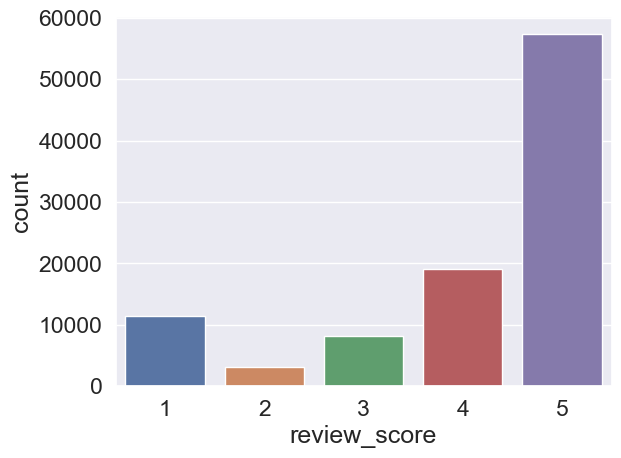

In [8]:
sns.countplot(reviews_df['review_score'])

In [9]:
customers_reviews_payments

NameError: name 'customers_reviews_payments' is not defined

In [ ]:
customers_reviews_payments = customers_reviews.merge(customer_payment, on=customers_reviews.index, how='left')

sns.scatterplot(data=customers_reviews_payments, x='review_score', y='payment_value')

### b) Products-oriented summary

In [ ]:
sns.countplot(ordersData['order_status'])

In [ ]:
# sort ascendingly for easier to read plot
plot = customer_regions.sort_values(by=('payment_value', 'mean'))

# make figure
fig, ax = plt.subplots(figsize= (12, 4))
ax = default_plot(ax, ['left', 'bottom'])
plt.xticks(rotation= 30)
plt.xlabel('State')
plt.ylabel('Mean Transaction (95% CI)')
plt.xlim(-0.5, 26.5)
plt.ylim(125, 325)
plt.scatter(plot['customer_state'], plot['payment_value']['mean'], s=100, c=plot['payment_value']['mean'])
plt.vlines(plot['customer_state'], plot['ci_low'], plot['ci_hi'], lw=.5)
plt.tight_layout()
plt.savefig('figures/customers_ci.png', dpi= 300)

### c) Geographical Analysis

In [ ]:
#Import required packages
import requests
import json

#Merge ordersData and itemsData into one unique dataset
df_orders_items = df_orders.merge(itemsData, how = 'left', on = 'order_id')

#Use the API to include the regions; based on long and lat (the API can be found on Brazil governmental website)
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = [c['UF'] for c in json.loads(r.text)]
br_info = pd.DataFrame(content)
br_info['region_name'] = br_info['regiao'].apply(lambda x: x['nome'])
br_info.drop('regiao', axis = 1, inplace = True)
br_info.drop_duplicates(inplace = True)

#Get the borders of Brazil (I will search for the boundaries of Brazil ~ their latitude and longitude)
#Brazil's most northern spot is at 5 deg 16′ 27.8″ N latitude
geo_prep = geolocationData[geolocationData.geolocation_lat <= 5.27438888]
#It’s most western spot is at 73 deg, 58′ 58.19″W Long
geo_prep = geo_prep[geo_prep.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude
geo_prep = geo_prep[geo_prep.geolocation_lat >= -33.75116944]
#It’s most eastern spot is 34 deg, 47′ 35.33″ W Long
geo_prep = geo_prep[geo_prep.geolocation_lng <=  -34.79314722]
geo_group = geo_prep.groupby(by = 'geolocation_zip_code_prefix', as_index = False).min()

#Merge all the data into one unique dataframe to be used
df_orders_items = df_orders_items.merge(br_info, how = 'left', left_on = 'customer_state', right_on = 'sigla')
df_orders_items = df_orders_items.merge(geo_group, how = 'left', left_on = 'customer_zip_code_prefix', 
                                        right_on = 'geolocation_zip_code_prefix')

#Display the data
df_orders_items.head()

In [ ]:
#Filter data between January 2017 and August 2018
df_orders_filt = df_orders_items[(df_orders_items['order_purchase_year_month'].astype(int) >= 201701)]
df_orders_filt = df_orders_filt[(df_orders_filt['order_purchase_year_month'].astype(int) <= 201808)]

In [ ]:
#Group data by region
df_regions_group = df_orders_filt.groupby(by = ['order_purchase_year_month', 'region_name'], as_index = False)
df_regions_group = df_regions_group.agg({'customer_id': 'count', 'price': 'sum'}).sort_values(by = 'order_purchase_year_month')
df_regions_group.columns = ['month', 'region', 'order_count', 'order_amount']
df_regions_group.reset_index(drop = True, inplace = True)

#Group data by city (top 10)
df_cities_group = df_orders_filt.groupby(by = 'geolocation_city', 
                                       as_index = False).count().loc[:, ['geolocation_city', 'order_id']]
df_cities_group = df_cities_group.sort_values(by = 'order_id', ascending = False).reset_index(drop = True)
df_cities_group = df_cities_group.iloc[:10, :]

In [ ]:
#Initialize figure
fig = plt.figure(constrained_layout = True, figsize = (17, 14))
gs = GridSpec(2, 2, figure = fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

#Plot count of orders by region
sns.lineplot(x = 'month', y = 'order_count', ax = ax1, data = df_regions_group, hue = 'region', 
             size = 'region', style = 'region', palette = 'magma', markers = ['o'] * 5)
ax1.set_title('Evolution of E-Commerce Orders on Brazilian Regions', size = 12, color = 'dimgrey')
ax1.set_ylabel('')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

#Top cities with most orders in Brazil
sns.barplot(y = 'geolocation_city', x = 'order_id', data = df_cities_group, ax = ax2, palette = 'magma')
ax2.set_title('Top 10 Brazilian Cities with More Orders', size = 12, color = 'dimgrey')
ax2.set_ylabel('')

#Total orders by state
sns.countplot(y = 'customer_state', ax = ax3, df = df_orders_filt, palette = 'viridis')
ax3.set_title('Total of Customers Orders by State', size = 12, color = 'dimgrey')
ax3.set_ylabel('')

#Display plot
plt.show()

### c) Summary Review

In [ ]:
reviews_df

In [ ]:
sns.countplot(reviews_df['review_score'])

In [ ]:
reviews_df['comment_length'] = reviews_df['review_comment_message'].str.len()
reviews_df['comment_length'].fillna(0, inplace=True)

reviews_df

In [ ]:
reviews_df.groupby('review_score').agg({'comment_length':'count'}) / len(reviews_df)

In [ ]:
g = sns.FacetGrid(data=reviews_df, col='review_score', hue='review_score')
g.map(plt.hist, 'log_cmt_length', bins=40)
g.set_xlabels('Comment Length')
g.set_ylabels('Number of Reviews')
plt.gcf().set_size_inches(12, 5)

### d) Time-series analysis

In [ ]:
#Merge the ordersData and customerData datasets on customer_id
df_orders = orders_df.merge(customer_df, how = 'left', on = 'customer_id')

In [ ]:
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']

#Iterate through timestamp_cols and change type to datetime
for col in timestamp_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])
    
#Extract attributes on purchase date - (year and month)
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.year)
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.month)
df_orders['order_purchase_month_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df_orders['order_purchase_year_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

#Extract attributes on purchase date - (day and day of week)
df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.day)
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df_orders['order_purchase_dayofweek_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

#Extract attributes on purchase date - (hour and time of day)
df_orders['order_purchase_hour'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.hour)

#Create hour bins and labels
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df_orders['order_purchase_time_day'] = pd.cut(df_orders['order_purchase_hour'], hours_bins, labels = hours_labels)

#Display new dataframe after transformations
df_orders.head()

In [ ]:
from matplotlib.gridspec import GridSpec

#Initialize plot
fig = plt.figure(constrained_layout = True, figsize = (15, 16))

#Define axes
gs = GridSpec(2, 2, figure = fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

#Lineplot displaying the evolution of e-commerce orders over time 
sns.lineplot(data = df_orders['order_purchase_year_month'].value_counts().sort_index(), ax = ax1, 
             color = 'darkslateblue', linewidth = 2)

ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext = (-75, -25), 
             textcoords = 'offset points', bbox = dict(boxstyle = "round4", fc = "w", pad = .8),
             arrowprops = dict(arrowstyle = '-|>', fc = 'w'), color = 'dimgrey', ha = 'center')

ax1.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext = (48, 25), 
             textcoords = 'offset points', bbox = dict(boxstyle = "round4", fc = "w", pad = .5),
             arrowprops = dict(arrowstyle = '-|>', fc = 'w'), color = 'dimgrey', ha = 'center')
  
#Set the ticks and title
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size = 14, color = 'dimgrey')

# Barchart - Total of orders by day of week
sns.countplot(df_orders, x='order_purchase_dayofweek', ax=ax2, palette='YlGnBu')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)

#display
plt.show()